In [ ]:
!pip install geopandas
!pip install cartopy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 27.3 MB/s eta 0:00:00


Saving tunisia_natural.dbf to tunisia_natural.dbf
Saving tunisia_natural.prj to tunisia_natural.prj
Saving tunisia_natural.shp to tunisia_natural.shp
Saving tunisia_natural.shx to tunisia_natural.shx


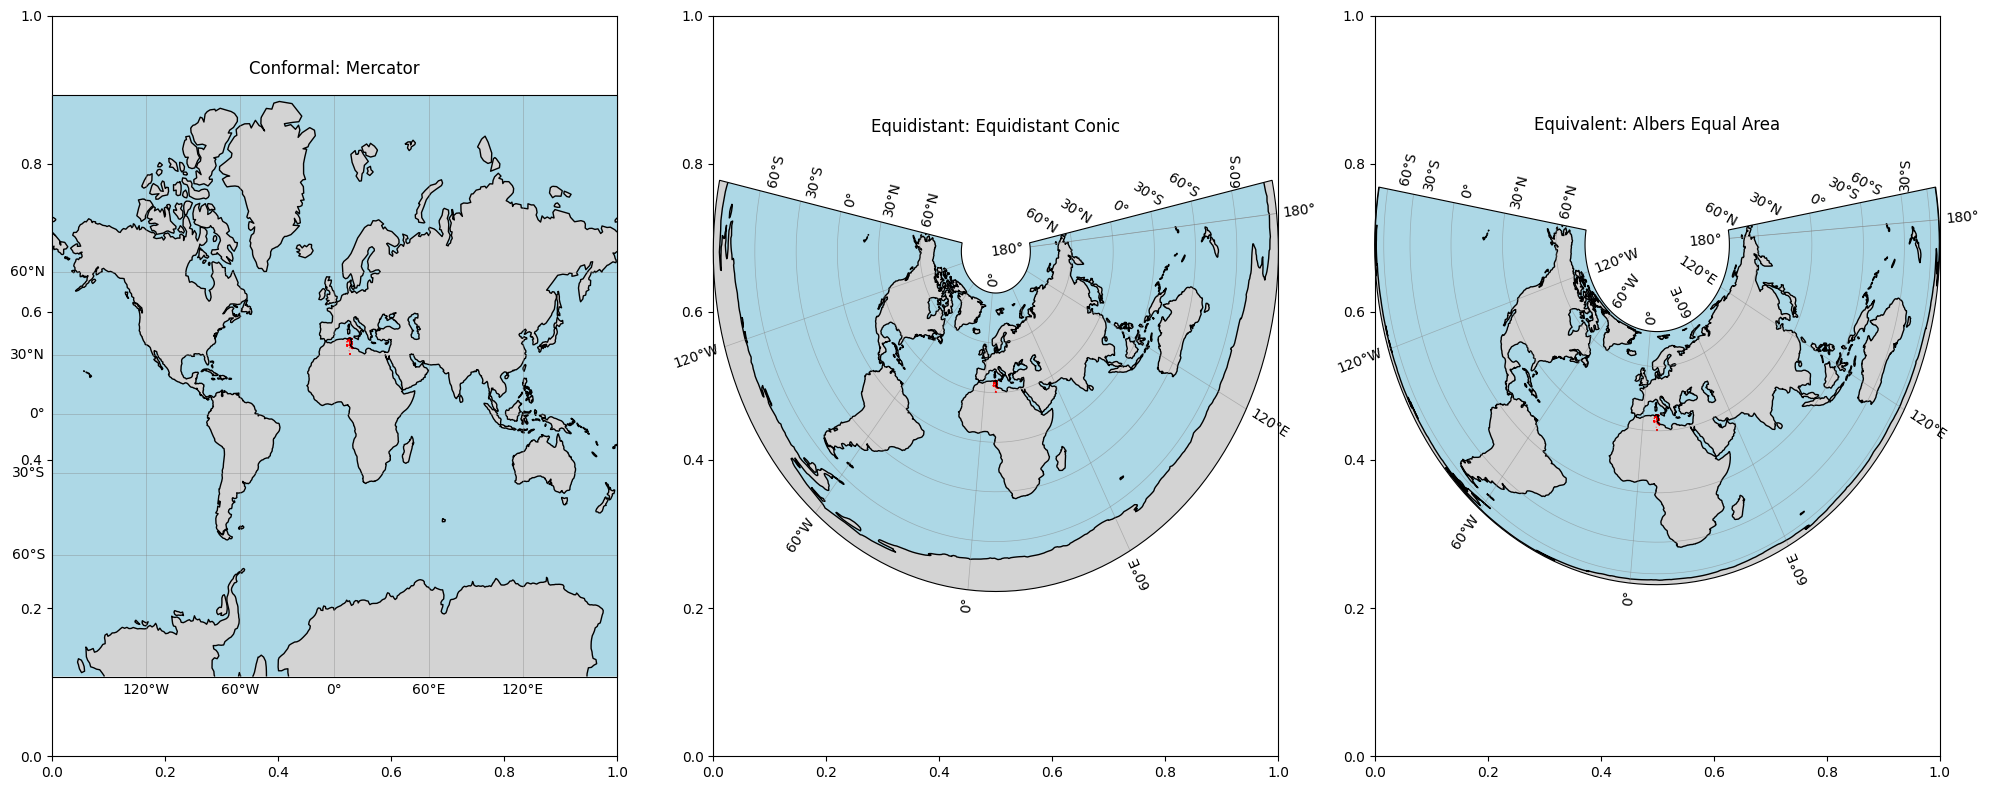

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from google.colab import files

# Cette ligne va te permettre de téléverser tes fichiers
uploaded = files.upload()

gdf = gpd.read_file("tunisia_natural.shp")


fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# الاسقاطات الثلاثة
projections = [
    ccrs.Mercator(),  # Conforme
    ccrs.EquidistantConic(central_longitude=10, central_latitude=34),  # Équidistante
    ccrs.AlbersEqualArea(central_longitude=10, central_latitude=34)  # Équivalente
]

titles = [
    "Conformal: Mercator",
    "Equidistant: Equidistant Conic",
    "Equivalent: Albers Equal Area"
]

#Maps
for i, ax in enumerate(axes):
    # Set up the projection
    ax = plt.subplot(1, 3, i+1, projection=projections[i])

    # Add basic map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.COASTLINE)

    # Plot your shapefile data
    gdf.plot(ax=ax, transform=ccrs.PlateCarree(),
             edgecolor='red', facecolor='none', linewidth=1)

    # Set title and adjust view
    ax.set_title(titles[i], pad=15)
    ax.set_global()  # Or use set_extent() to zoom

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

plt.tight_layout()

# Enregistrer la figure en image png
plt.savefig('tunisia_natural.png', dpi=300, bbox_inches='tight')

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

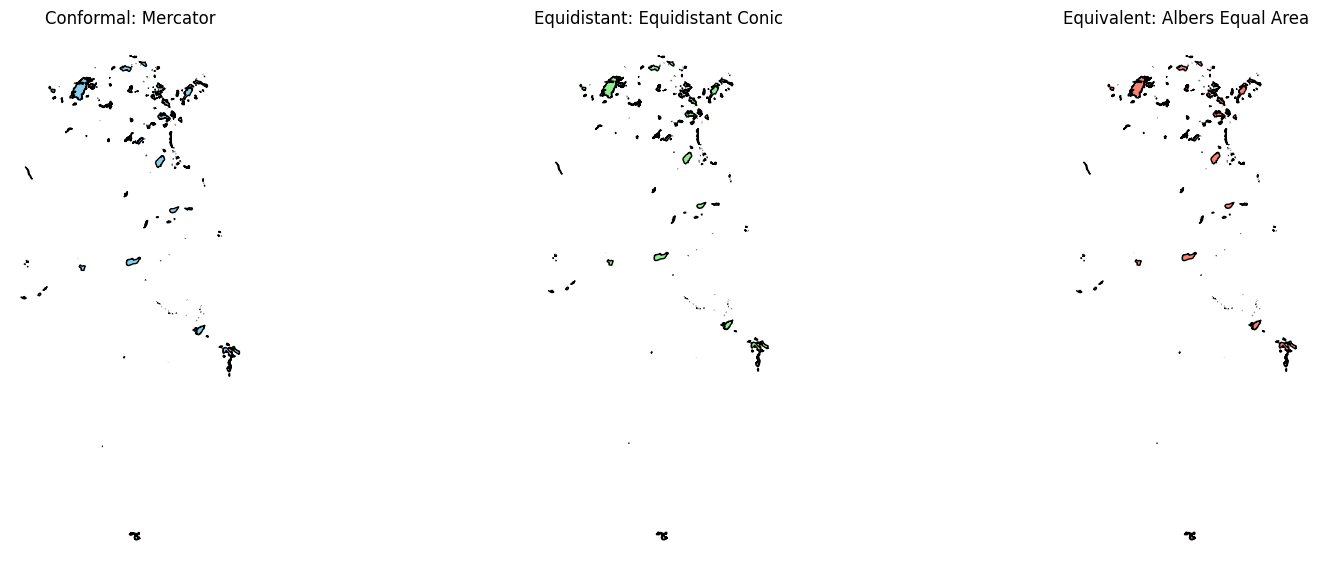

In [8]:

import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from google.colab import files


# Upload all related shapefiles (.shp, .shx, .dbf, .prj) via the upload panel
gdf = gpd.read_file("tunisia_natural.shp")

# 2. Define projections
proj_mercator = "EPSG:3395"  # Mercator (Conformal)
proj_equidist = "+proj=eqdc +lon_0=10 +lat_0=34 +lat_1=33 +lat_2=36"  # Equidistant Conic
proj_albers = "+proj=aea +lat_1=33 +lat_2=36 +lat_0=34 +lon_0=10"  # Albers Equal Area (Equivalent)

# 3. Project the GeoDataFrame
gdf_mercator = gdf.to_crs(proj_mercator)
gdf_equidist = gdf.to_crs(proj_equidist)
gdf_albers = gdf.to_crs(proj_albers)

# 4. Save projected files as GeoJSON
gdf_mercator.to_file("tunisia_mercatornatural.geojson", driver="GeoJSON")
gdf_equidist.to_file("tunisia_equidistantnatural.geojson", driver="GeoJSON")
gdf_albers.to_file("tunisia_albersnatural.geojson", driver="GeoJSON")

# 5. Download them
files.download("tunisia_mercatornatural.geojson")
files.download("tunisia_equidistantnatural.geojson")
files.download("tunisia_albersnatural.geojson")

# 6. Plot the three projections
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Mercator
axs[0].set_title("Conformal: Mercator")
gdf_mercator.plot(ax=axs[0], color='skyblue', edgecolor='black')
axs[0].axis('off')

# Plot Equidistant
axs[1].set_title("Equidistant: Equidistant Conic")
gdf_equidist.plot(ax=axs[1], color='lightgreen', edgecolor='black')
axs[1].axis('off')

# Plot Equivalent
axs[2].set_title("Equivalent: Albers Equal Area")
gdf_albers.plot(ax=axs[2], color='salmon', edgecolor='black')
axs[2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
!pip install geopandas

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 52.1 MB/s eta 0:00:00
